<a href="https://colab.research.google.com/github/LOPAMUDRA-MUKHERJEE/DataSC/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Numpy & Pandas Basics

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Iris.csv')
import matplotlib.pyplot as plt

df.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Question 2: Pandas Groupby


In [4]:
df.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [5]:
max_petal_length = df.groupby('Species')['PetalLengthCm'].mean().sort_values(ascending=False).index[0]
print(f"Species with the highest mean petal length: {max_petal_length}")

Species with the highest mean petal length: Iris-virginica


Question 3: Univariate & Bivariate Analysis


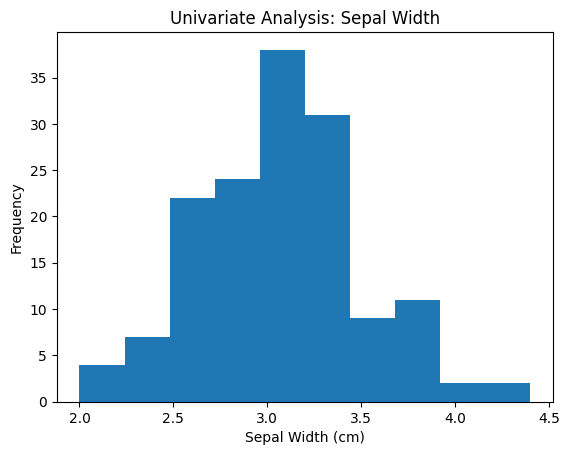

In [6]:
sepal_width = df['SepalWidthCm']
plt.hist(sepal_width)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.title('Univariate Analysis: Sepal Width')
plt.show()


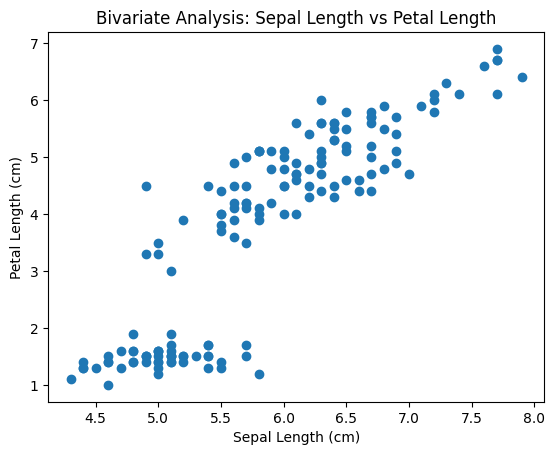

In [7]:
plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Bivariate Analysis: Sepal Length vs Petal Length')
plt.show()


Question 4: Data Visualization using Matplotlib


<ipython-input-8-73aef8b5ef38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


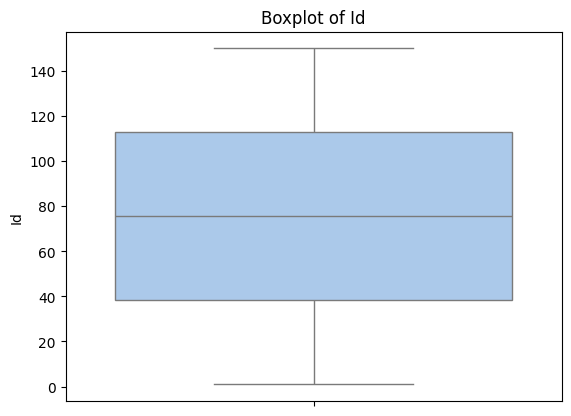

<ipython-input-8-73aef8b5ef38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


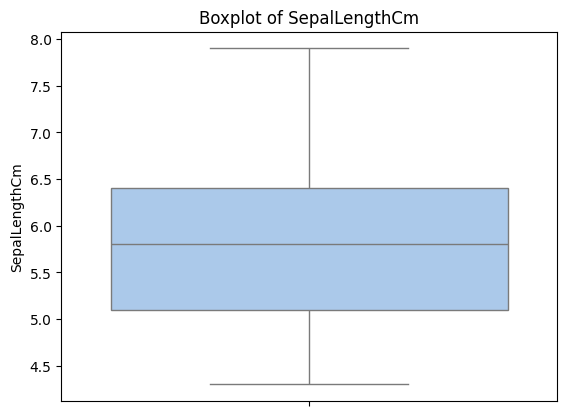

<ipython-input-8-73aef8b5ef38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


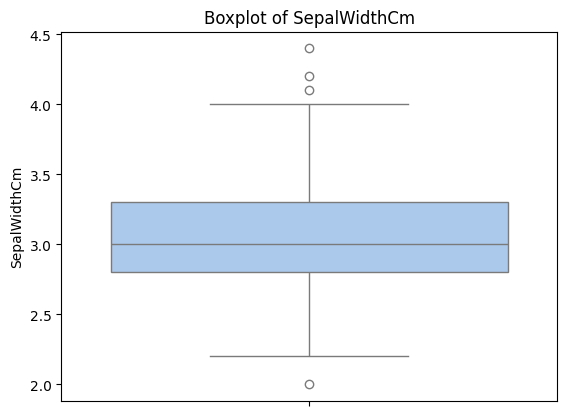

<ipython-input-8-73aef8b5ef38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


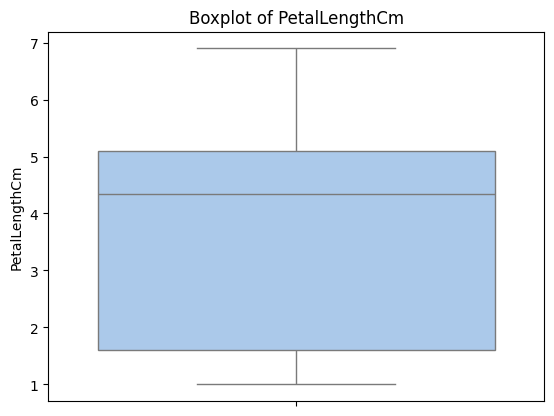

<ipython-input-8-73aef8b5ef38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


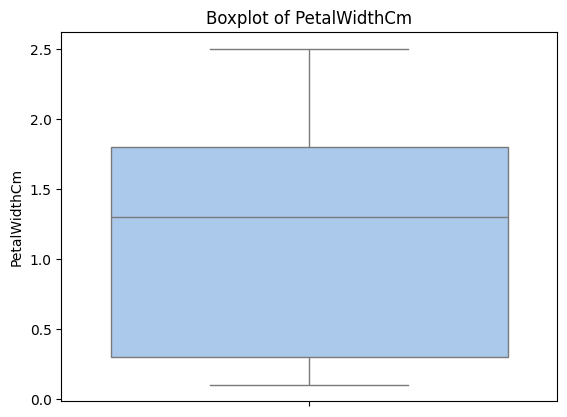

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(y=df[col], palette='pastel')
    plt.title(f'Boxplot of {col}')
    plt.show()


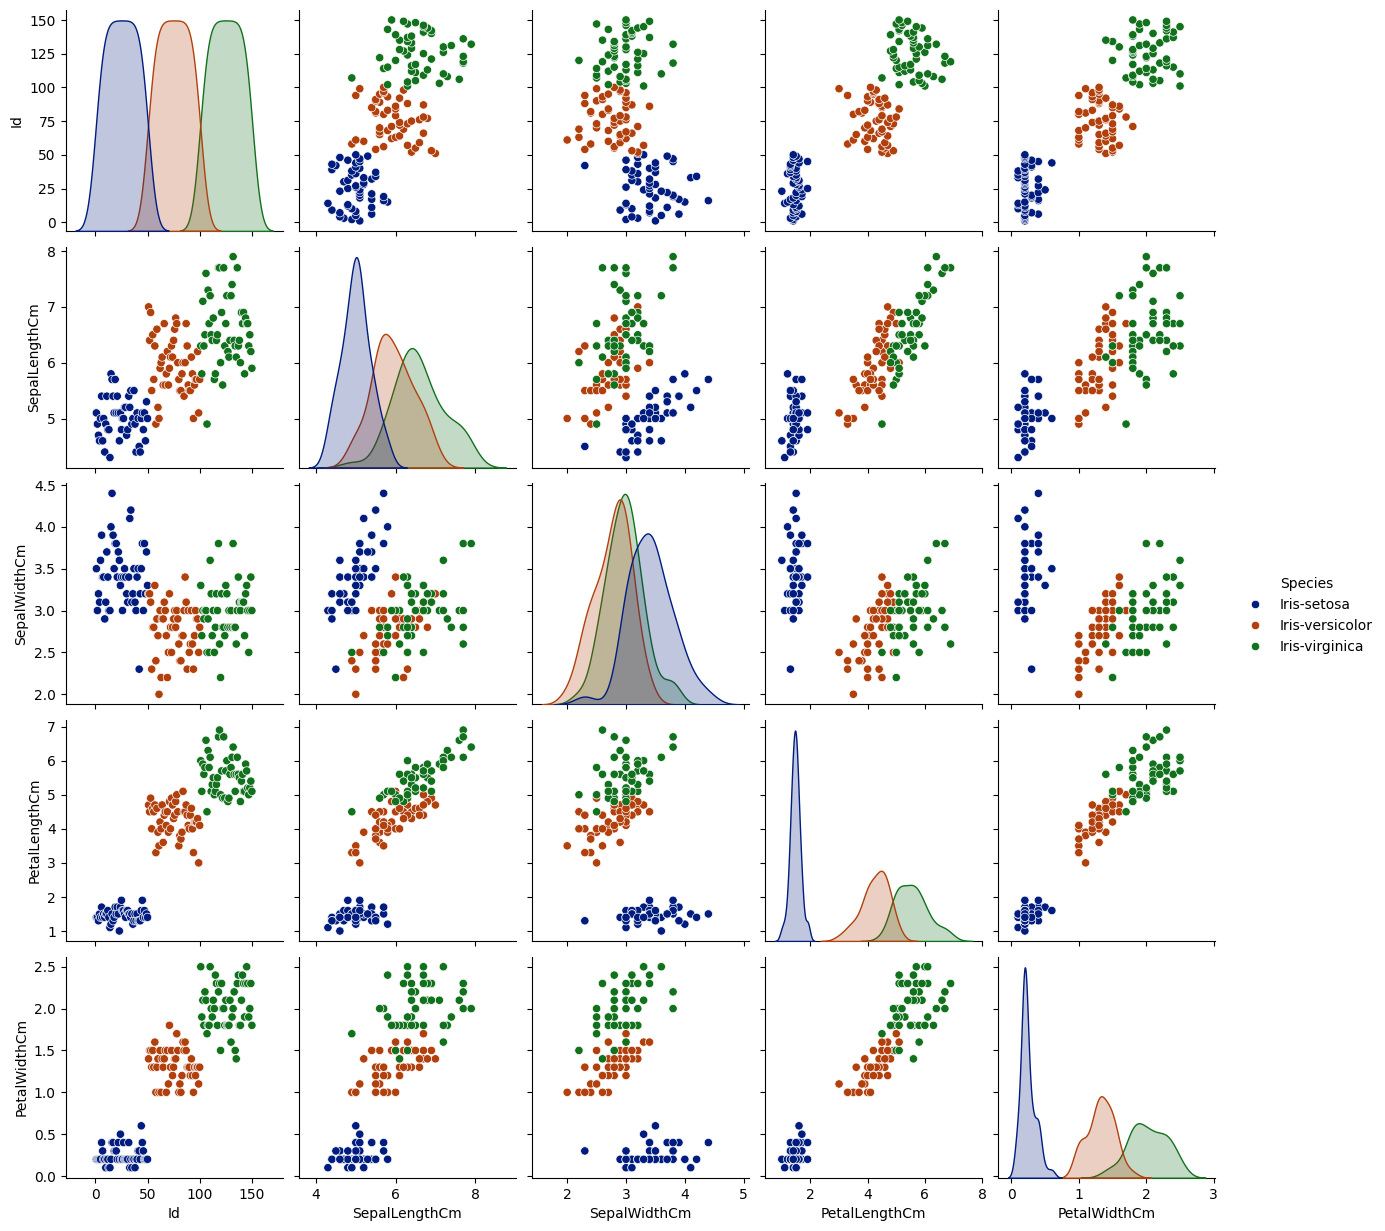

In [9]:
sns.pairplot(df, hue='Species', palette='dark')
plt.show()


Question 5: Statistics


In [10]:
petal_width = df['PetalWidthCm']

mean = petal_width.mean()
median = petal_width.median()
variance = petal_width.var()
std_dev = petal_width.std()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")


Mean: 1.1986666666666668
Median: 1.3
Variance: 0.582414317673378
Standard Deviation: 0.7631607417008411


In [11]:
import scipy.stats as stats

z_scores = stats.zscore(df['PetalWidthCm'])
print(z_scores)

outliers = df[abs(z_scores) > 3]

if len(outliers) > 0:
  print("Outliers detected:")
  print(outliers)
else:
  print("No outliers detected.")


0     -1.312977
1     -1.312977
2     -1.312977
3     -1.312977
4     -1.312977
         ...   
145    1.447956
146    0.922064
147    1.053537
148    1.447956
149    0.790591
Name: PetalWidthCm, Length: 150, dtype: float64
No outliers detected.


WINE DATASET

Question 1: Classification using KNN, DecisionTreeClassifier, and RandomForestClassifier

In [12]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/winequality-white.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (3918, 11)
Shape of X_test: (980, 11)
Shape of y_train: (3918,)
Shape of y_test: (980,)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
#Evalauation
print("KNN Classifier")
print("Training Data Accuracy" , knn.score(X_train, y_train))
print("Test Data Accuracy" , knn.score(X_test, y_test))

KNN Classifier
Training Data Accuracy 0.6932108218478815
Test Data Accuracy 0.5530612244897959


In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Evaluate the Decision Tree classifier
print("Decision Tree Classifier")
print("Training Data Accuracy (Decision Tree):", dt_clf.score(X_train, y_train))
print("Test Data Accuracy (Decision Tree):", dt_clf.score(X_test, y_test))

Decision Tree Classifier
Training Data Accuracy (Decision Tree): 1.0
Test Data Accuracy (Decision Tree): 0.6091836734693877


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Evaluate the Random Forest classifier
print("Random Forest Classifier")
print("Training Data Accuracy (Random Forest):", rf_clf.score(X_train, y_train))
print("Test Data Accuracy (Random Forest):", rf_clf.score(X_test, y_test))

Random Forest Classifier
Training Data Accuracy (Random Forest): 1.0
Test Data Accuracy (Random Forest): 0.6908163265306122


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
knn_precision = precision_score(y_test, knn.predict(X_test), average='weighted')
knn_recall = recall_score(y_test, knn.predict(X_test), average='weighted')

dt_accuracy = accuracy_score(y_test, dt_clf.predict(X_test))
dt_precision = precision_score(y_test, dt_clf.predict(X_test), average='weighted')
dt_recall = recall_score(y_test, dt_clf.predict(X_test), average='weighted')

rf_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
rf_precision = precision_score(y_test, rf_clf.predict(X_test), average='weighted')
rf_recall = recall_score(y_test, rf_clf.predict(X_test), average='weighted')

# Print the results
print("KNN:")
print(f"Accuracy: {knn_accuracy:.3f}")
print(f"Precision: {knn_precision:.3f}")
print(f"Recall: {knn_recall:.3f}")

print("\nDecision Tree:")
print(f"Accuracy: {dt_accuracy:.3f}")
print(f"Precision: {dt_precision:.3f}")
print(f"Recall: {dt_recall:.3f}")

print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN:
Accuracy: 0.553
Precision: 0.546
Recall: 0.553

Decision Tree:
Accuracy: 0.609
Precision: 0.617
Recall: 0.609

Random Forest:
Accuracy: 0.691
Precision: 0.694
Recall: 0.691


Question 2: Regression - Simple Linear Regression

In [22]:
import numpy as np
import matplotlib.pyplot as plt
feature_name = 'alcohol'
target_name = 'quality'
X_train, X_test, y_train, y_test = train_test_split(df[feature_name], df[target_name], test_size=0.2, random_state=42)



In [23]:
# Train a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test.values.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)

r2_score = r2_score(y_test, y_pred)

print(f"Mean squared error (MSE): {mse:.3f}")
print(f"R-squared score: {r2_score:.3f}")


Mean squared error (MSE): 0.618
R-squared score: 0.202


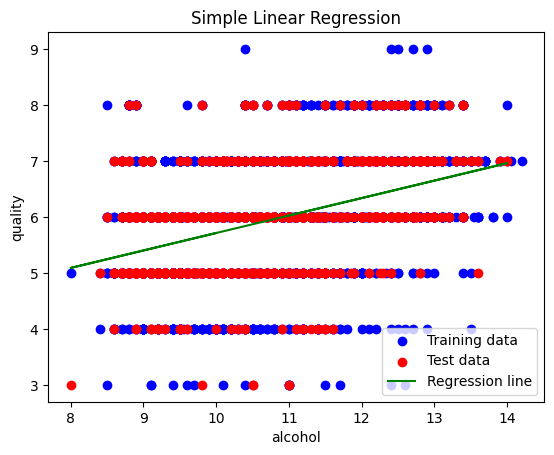

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')

plt.plot(X_test, model.predict(X_test.values.reshape(-1, 1)), color='green', label='Regression line')

plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.title('Simple Linear Regression')

plt.legend()
plt.show()


Question 3: Regression Corelation and Non-Linearity

In [26]:
correlation_matrix = df.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [27]:
correlations = df.corr()['quality'].sort_values(ascending=False)

top_3_features = correlations[1:4].index.tolist()
print(f"Top 3 features most correlated with 'quality': {top_3_features}")


Top 3 features most correlated with 'quality': ['alcohol', 'pH', 'sulphates']


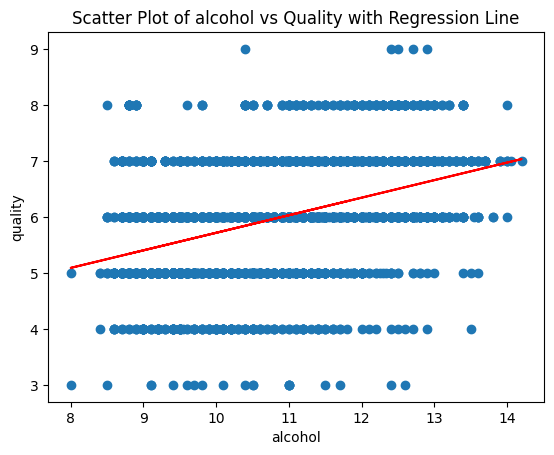

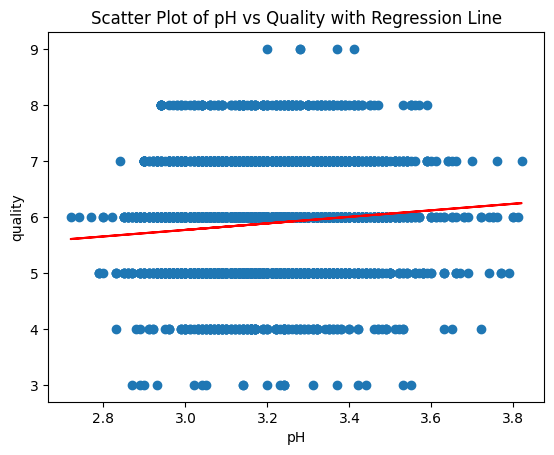

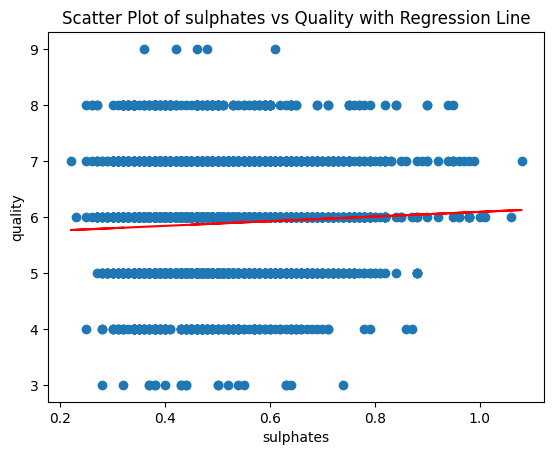

In [28]:
import matplotlib.pyplot as plt
for feature in top_3_features:
  plt.scatter(df[feature], df['quality'])

  model = LinearRegression()
  model.fit(df[[feature]], df['quality'])
  y_pred = model.predict(df[[feature]])
  plt.plot(df[feature], y_pred, color='red')

  plt.xlabel(feature)
  plt.ylabel('quality')
  plt.title(f'Scatter Plot of {feature} vs Quality with Regression Line')

  plt.show()


Question 4: Unsupervised Data - Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       1
1       0
2       2
3       1
4       1
       ..
4893    2
4894    1
4895    2
4896    2
4897    2
Name: Cluster, Length: 4898, dtype: int32


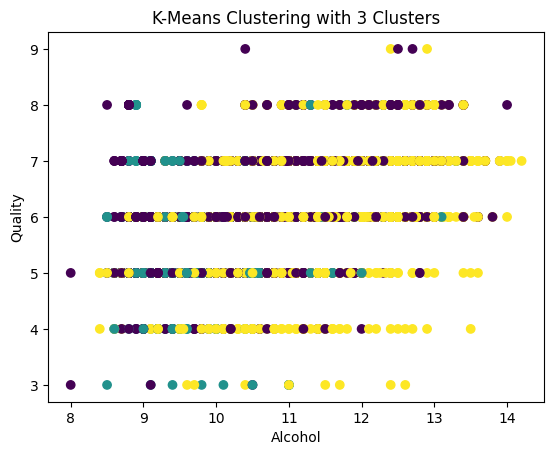

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(df.drop('quality', axis=1))

cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

print(df['Cluster'])

plt.scatter(df['alcohol'], df['quality'], c=df['Cluster'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

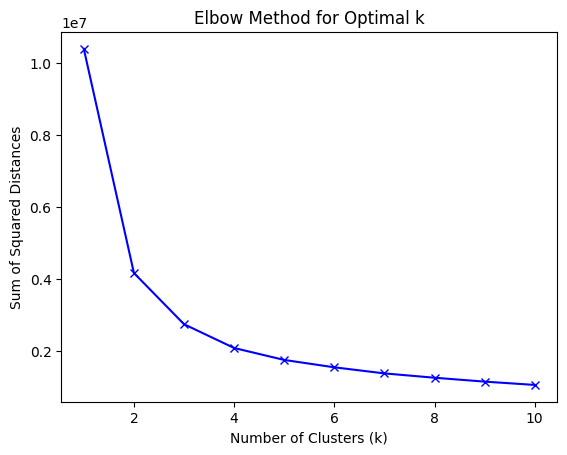

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       0
1       1
2       2
3       0
4       0
       ..
4893    2
4894    0
4895    2
4896    2
4897    2
Name: Cluster, Length: 4898, dtype: int32


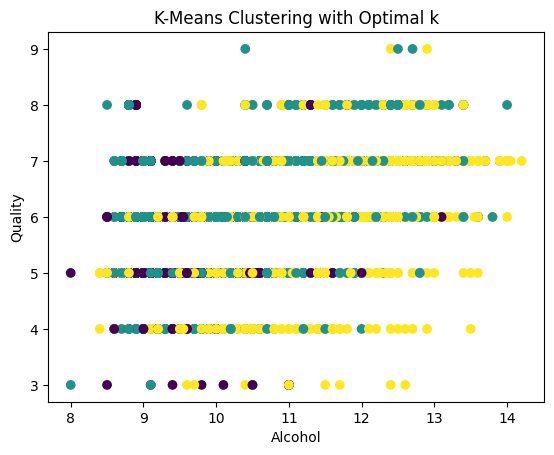

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sum_of_squared_distances = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)

  kmeans.fit(df.drop('quality', axis=1))

  sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1, 11), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the k value where the curve starts to flatten out
optimal_k = 3

# Create a KMeans object with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(df.drop('quality', axis=1))

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print the cluster labels
print(df['Cluster'])

# Visualize the clusters
plt.scatter(df['alcohol'], df['quality'], c=df['Cluster'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('K-Means Clustering with Optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


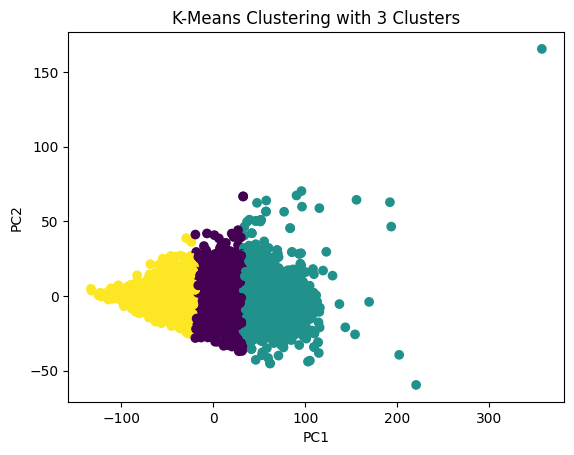

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('quality', axis=1))
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data)
cluster_labels = kmeans.labels_
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()


Question 5: Association Rule Mining for Recommendation System


In [41]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
binary_matrix = te.fit_transform(df.drop('quality', axis=1))
basket = pd.DataFrame(binary_matrix, columns=te.columns_)
print(basket.head(5))

              H      a      c     d      e      f      g      h     i  ...  \
0   True  False   True   True  True   True   True  False  False  True  ...   
1   True  False   True   True  True   True  False  False  False  True  ...   
2   True  False   True   True  True  False  False  False  False  True  ...   
3   True  False   True  False  True   True  False   True  False  True  ...   
4  False  False  False   True  True   True  False  False   True  True  ...   

       n      o      p      r      s      t      u      v      x      y  
0  False  False  False  False  False   True  False  False   True   True  
1  False   True  False  False  False   True  False   True  False   True  
2  False  False  False   True  False   True  False  False  False  False  
3  False  False  False   True   True  False   True  False  False  False  
4  False   True  False   True   True  False  False  False  False  False  

[5 rows x 21 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(basket, use_colnames=True , min_support = 0.02)
print(frequent_itemsets)

Empty DataFrame
Columns: [support, itemsets]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Question 6: Principal Component Analysis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.90965734 0.07933386]


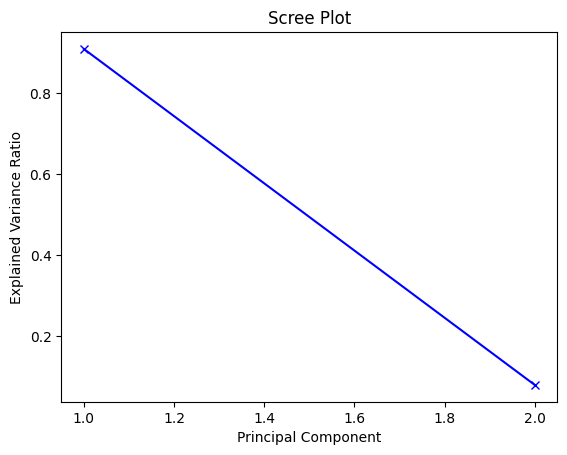

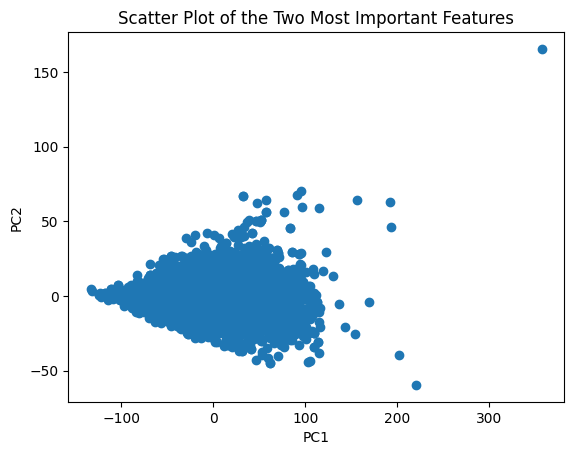

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('quality', axis=1))

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bx-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of the Two Most Important Features')
plt.show()


In [49]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
threshold = 0.9
target_index = np.argmax(cumulative_explained_variance >= threshold)
print(f"Number of components that explain at least 90% of the variance: {target_index + 1}")


Number of components that explain at least 90% of the variance: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


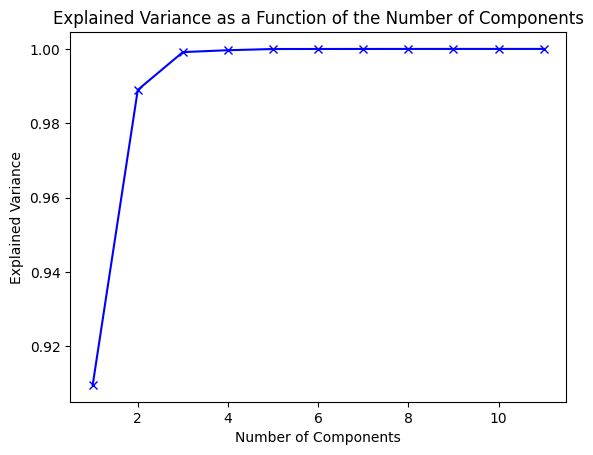

In [50]:
n_components = range(1, len(df.drop('quality', axis=1).columns) + 1)
explained_variance = np.zeros(len(n_components))
for i in range(len(n_components)):
  pca = PCA(n_components=i+1)
  pca.fit(df.drop('quality', axis=1))
  explained_variance[i] = pca.explained_variance_ratio_.sum()

plt.plot(n_components, explained_variance, 'bx-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance as a Function of the Number of Components')
plt.show()


In [53]:
n_components = 4
pca = PCA(n_components=n_components)
pca.fit(df.drop('quality', axis=1))
transformed_data = pca.transform(df.drop('quality', axis=1))
print(transformed_data)

[[ 33.7327539    1.23828497  12.77529181  -0.23492246]
 [-11.92579973 -18.95751887  -3.85783398  -1.24998841]
 [-41.22467147   5.73987365   2.4660316   -0.95347095]
 ...
 [-27.99422284   1.98656157  -3.76679051  -1.74216645]
 [-31.62562278  -7.36798453  -3.85584946   1.80558587]
 [-42.66909003  -2.30113142  -3.60383843   0.57816712]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Question 7: Combining Techniques for a Comprehensive Analysis


In [57]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(df.drop('quality', axis=1))
X_train, X_test, y_train, y_test = train_test_split(pca_data, df['quality'], test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print("Random Forest Classifier (with PCA)")
print("Training Data Accuracy:", rf_clf.score(X_train, y_train))
print("Test Data Accuracy:", rf_clf.score(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest Classifier (with PCA)
Training Data Accuracy: 1.0
Test Data Accuracy: 0.6806122448979591


In [59]:
from sklearn.pipeline import Pipeline
# Train the combined model
combined_model = Pipeline([
  ('pca', pca),
  ('rf_clf', rf_clf)
])
combined_model.fit(X_train, y_train)

# Evaluate the combined model
print("Combined Model (PCA + Random Forest)")
print("Training Data Accuracy:", combined_model.score(X_train, y_train))
print("Test Data Accuracy:", combined_model.score(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Combined Model (PCA + Random Forest)
Training Data Accuracy: 0.9997447677386422
Test Data Accuracy: 0.6795918367346939


In [60]:
# Train a Random Forest classifier without PCA
rf_clf_without_pca = RandomForestClassifier(random_state=42)
rf_clf_without_pca.fit(X_train, y_train)

# Evaluate the Random Forest classifier without PCA
print("Random Forest Classifier (without PCA)")
print("Training Data Accuracy:", rf_clf_without_pca.score(X_train, y_train))
print("Test Data Accuracy:", rf_clf_without_pca.score(X_test, y_test))

# Compare the performance of the two models
print("Performance Comparison:")
print("Random Forest (without PCA):")
print("- Training Accuracy:", rf_clf_without_pca.score(X_train, y_train))
print("- Test Accuracy:", rf_clf_without_pca.score(X_test, y_test))
print("Combined Model (PCA + Random Forest):")
print("- Training Accuracy:", combined_model.score(X_train, y_train))
print("- Test Accuracy:", combined_model.score(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest Classifier (without PCA)
Training Data Accuracy: 1.0
Test Data Accuracy: 0.6806122448979591
Performance Comparison:
Random Forest (without PCA):
- Training Accuracy: 1.0
- Test Accuracy: 0.6806122448979591
Combined Model (PCA + Random Forest):
- Training Accuracy: 0.9997447677386422
- Test Accuracy: 0.6795918367346939
